# <h1 align="center"> © RsydMathTech. <h1/>

# Measures for In-Sample Evaluation

---

## 1. Mean Squared Error (MSE)

### Definisi
- MSE mengukur rata-rata **kuadrat selisih antara nilai aktual dan prediksi**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- $y_i$ → nilai aktual  
- $\hat{y}_i$ → nilai prediksi  
- $n$ → jumlah sampel

### Tujuan
- Menilai seberapa **jauh prediksi model dari nilai aktual** di dataset training.

### Interpretasi
- **MSE kecil** → model fit baik  
- **MSE besar** → model kurang fit

---

## 2. Coefficient of Determination ($R^2$)

### Definisi
- $R^2$ mengukur **seberapa dekat data aktual ke garis regresi**:

$$
R^2 = 1 - \frac{\text{MSE}_{\text{model}}}{\text{MSE}_{\text{mean}}}
$$

- $\text{MSE}_{\text{model}}$ → kuadrat error garis regresi  
- $\text{MSE}_{\text{mean}}$ → kuadrat error jika prediksi hanya pakai rata-rata target

### Tujuan
- Menilai **seberapa baik model dibanding hanya pakai mean**.

### Interpretasi
- Model fit bagus jika:
$$
R^2 \approx 1
$$
- Model tidak lebih baik dari rata-rata jika:
$$
R^2 \approx 0
$$
- Model lebih buruk dari rata-rata (overfitting / model tidak sesuai) jika:
$$
R^2 < 0
$$

### Analogi Visual
- **Garis biru** → garis regresi (prediksi model)  
- **Garis merah** → rata-rata target  
- **Blue squares** → error model  
- **Red squares** → error rata-rata  
- Jika area blue squares lebih kecil → $R^2$ tinggi  
- Jika area sama → $R^2$ rendah  

### Catatan
- $R^2$ biasanya antara 0 dan 1  
- $R^2$ negatif bisa muncul karena **overfitting**  
- Contoh: $R^2 = 0.49695$ → ~49.7% variasi target dijelaskan model

---

## 3. Contoh Kasus Regresi

| Model | Fitur | Tipe Model | Catatan |
|-------|-------|------------|---------|
| SLR   | 1     | Linear     | Hubungan linear jelas |
| MLR   | 2     | Linear     | Prediksi target dari 2 fitur |
| PLR Pipeline | 2 | Polynomial + Interaksi | Memakai pipeline + scaler, menangkap interaksi & variasi non-linear |

### Catatan Plot & Evaluasi
- Semua plot: **scatter / distribution & residual**  
- Semua dihitung **MSE & $R^2$** → evaluasi numerik in-sample

### Analogi Visual Lengkap
1. **Scatter Plot:** titik data vs garis prediksi  
2. **Distribution Plot:** distribusi prediksi vs aktual  
3. **Residual Plot:** error tersebar acak → indikasi model fit baik  
4. **Blue / Red Squares:** visual MSE → lihat kenapa R² tinggi / rendah


# --- Libraries ---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
np.random.seed(42)

# --- 1. Simple Linear Regression (SLR) ---


SLR Evaluation:
MSE = 80.49
R²  = 0.94


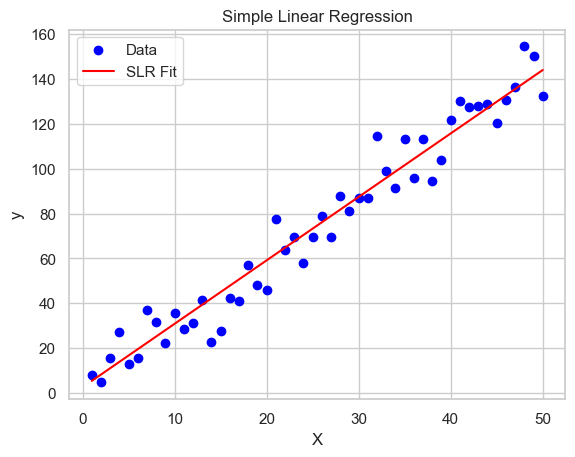

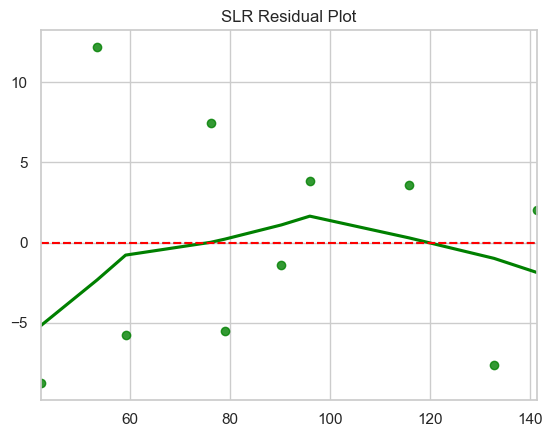

In [3]:
# Data
X_slr = np.linspace(1, 50, 50).reshape(-1,1)
y_slr = 3*X_slr.flatten() + np.random.normal(0, 10, 50)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_slr, y_slr, test_size=0.2, random_state=42)

# Model
slr = LinearRegression()
slr.fit(X_train, y_train)
yhat_slr = slr.predict(X_test)

# Evaluation
mse_slr = mean_squared_error(y_test, yhat_slr)
r2_slr = r2_score(y_test, yhat_slr)

print("SLR Evaluation:")
print(f"MSE = {mse_slr:.2f}")
print(f"R²  = {r2_slr:.2f}")

# Plots
plt.scatter(X_slr, y_slr, color="blue", label="Data")
plt.plot(X_slr, slr.predict(X_slr), color="red", label="SLR Fit")
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

sns.residplot(x=yhat_slr, y=y_test - yhat_slr, lowess=True, color="green")
plt.axhline(0, color="red", linestyle="--")
plt.title("SLR Residual Plot")
plt.show()

# --- 2. Multiple Linear Regression (MLR) ---


MLR Evaluation:
MSE = 86.12
R²  = 0.99


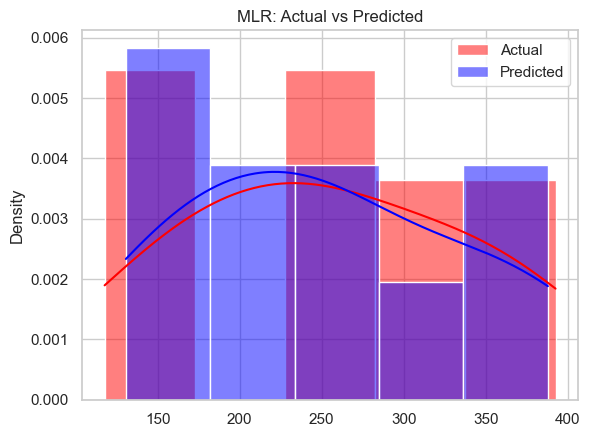

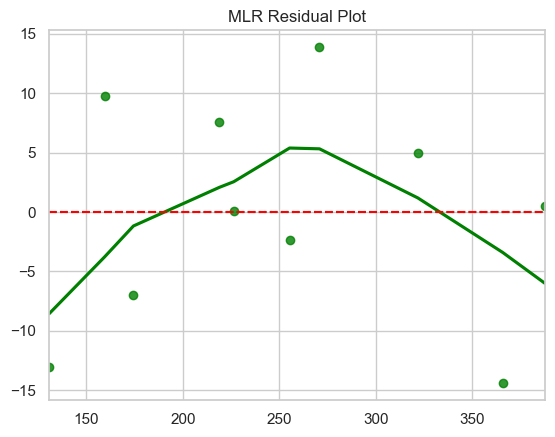

In [4]:
# Data
X1 = np.linspace(1, 50, 50)
X2 = np.linspace(10, 100, 50)
noise = np.random.normal(0, 10, 50)
y_mlr = 2*X1 + 3*X2 + noise
X_mlr = np.column_stack([X1, X2])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

# Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)
yhat_mlr = mlr.predict(X_test)

# Evaluation
mse_mlr = mean_squared_error(y_test, yhat_mlr)
r2_mlr = r2_score(y_test, yhat_mlr)

print("MLR Evaluation:")
print(f"MSE = {mse_mlr:.2f}")
print(f"R²  = {r2_mlr:.2f}")

# Plots
sns.histplot(y_test, color="red", label="Actual", kde=True, stat="density")
sns.histplot(yhat_mlr, color="blue", label="Predicted", kde=True, stat="density")
plt.legend()
plt.title("MLR: Actual vs Predicted")
plt.show()

sns.residplot(x=yhat_mlr, y=y_test - yhat_mlr, lowess=True, color="green")
plt.axhline(0, color="red", linestyle="--")
plt.title("MLR Residual Plot")
plt.show()

# --- 3. Polynomial Regression (PLR) Pipeline ---


PLR Pipeline Evaluation:
MSE = 210.90
R²  = 1.00


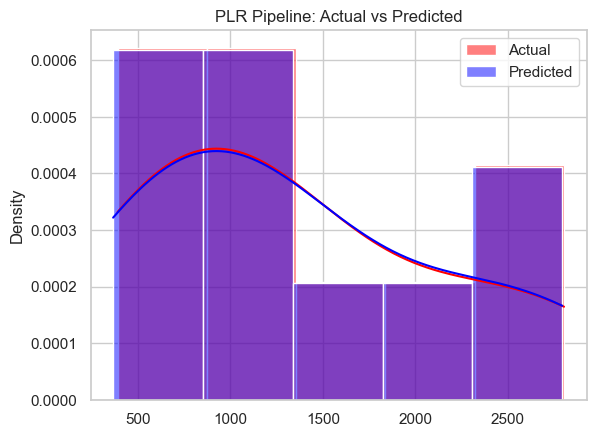

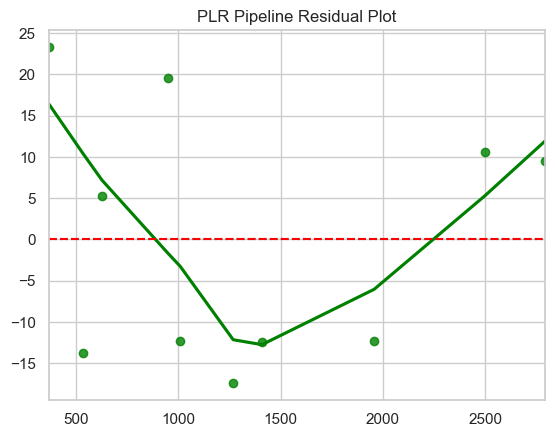

In [5]:
# Interaction Data
X1 = np.linspace(1, 50, 50)
X2 = np.linspace(10, 100, 50)
noise = np.random.normal(0, 10, 50)
y_plr = 2*X1 + 3*X2 + 0.5*X1*X2 + noise
X_plr = np.column_stack([X1, X2])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_plr, y_plr, test_size=0.2, random_state=42)

# Pipeline
plr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

# Train & Predict
plr_pipeline.fit(X_train, y_train)
yhat_plr = plr_pipeline.predict(X_test)

# Evaluation
mse_plr = mean_squared_error(y_test, yhat_plr)
r2_plr = r2_score(y_test, yhat_plr)

print("PLR Pipeline Evaluation:")
print(f"MSE = {mse_plr:.2f}")
print(f"R²  = {r2_plr:.2f}")

# Plots
sns.histplot(y_test, color="red", label="Actual", kde=True, stat="density")
sns.histplot(yhat_plr, color="blue", label="Predicted", kde=True, stat="density")
plt.legend()
plt.title("PLR Pipeline: Actual vs Predicted")
plt.show()

sns.residplot(x=yhat_plr, y=y_test - yhat_plr, lowess=True, color="green")
plt.axhline(0, color="red", linestyle="--")
plt.title("PLR Pipeline Residual Plot")
plt.show()